In [1]:
%run ../../src/start.py


python	3.9.6 (default, Jul 30 2021, 16:35:19) 
[GCC 7.5.0]
---------------------
Versions:
----------------------
pandas      1.3.1
numpy       1.20.3
matplotlib  3.4.2
seaborn     0.11.1
plotly      5.1.0
boto3       1.18.16
awswrangler 2.10.0
----------------------


Loaded Libraries
-------------------
import pandas as pd
import numpy as np
import sys,os
import re
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


## AWS
import boto3
import awswrangler as wr
----------------


GLOBAL VARIABLES
--------------------------
# Creating the low level functional client
client = boto3.client(
    's3',
    aws_access_key_id = AWS_KEY_ID,
    aws_secret_access_key = AWS_SECRET,
)
    
# Creating the high level object oriented interface
resource = boto3.resource(
    's3',
    aws_access_key_id = AWS_KEY_I

## Load Crime Data

In [2]:
# helper function
def bucket_raw_path(bucket_name,path_dir):
    ''''''
    raw_path = f's3://{bucket_name}/{path_dir}'
    return raw_path

In [95]:
raw = bucket_raw_path('dend-data',f'capstone/final-data/crime-data/')
raw

's3://dend-data/capstone/final-data/crime-data/'

## List Objects in bucket

In [96]:
wr.s3.list_objects(raw)

['s3://dend-data/capstone/final-data/crime-data/crime-09-18.csv']

# Create dataframe from S3

In [97]:
def s3_files_to_df(s3_files_path):
    ''' load s3 file path from wr result
    returns a dataframe of concat files '''
    df_list = []
    for i in wr.s3.list_objects(s3_files_path):
        temp = wr.s3.read_csv(i,)
        df_list.append(temp)
    # create df from list files
    df = pd.concat(df_list, ignore_index=True)
    return df

In [98]:
%%time
df_crime = s3_files_to_df(raw)

CPU times: user 2.24 s, sys: 879 ms, total: 3.12 s
Wall time: 37.7 s


In [99]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125124 entries, 0 to 1125123
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   date_time     1125124 non-null  object
 1   offenses      1125124 non-null  int64 
 2   offense_type  1125124 non-null  object
 3   block_range   1125124 non-null  object
 4   street_name   1125117 non-null  object
 5   type          1125124 non-null  object
 6   suffix        1125124 non-null  object
 7   beat          1125124 non-null  object
 8   premise       1125124 non-null  object
 9   year          1125124 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 85.8+ MB


# Crime Data
Total rows: $1,125,123$

In [10]:
df_crime.head()

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise,year
0,2009-08-01 00:00:00,1,Robbery,3000-3099,durham,dr,N,3B30,210,2009
1,2009-08-01 00:00:00,1,Robbery,500-599,seminar,dr,-,6B60,20a,2009
2,2009-08-01 00:00:00,1,Robbery,8300-8399,north houston rosslyn,rd,-,6B30,18n,2009
3,2009-08-01 00:00:00,1,Robbery,6300-6399,skyline,dr,-,18F30,18a,2009
4,2009-08-01 00:00:00,1,Robbery,5900-5999,fulton,st,-,2A20,18n,2009


# Load Weather Data

In [15]:
raw = bucket_raw_path('dend-data',f'capstone/inter-data/weather-data/')
raw

's3://dend-data/capstone/inter-data/weather-data/'

# List objects in bucket

In [16]:
wr.s3.list_objects(raw)

['s3://dend-data/capstone/inter-data/weather-data/weather-09-18.csv']

# Create dataframe from s3 files

In [17]:
%%time
df_weather = s3_files_to_df(raw)

CPU times: user 271 ms, sys: 73.9 ms, total: 345 ms
Wall time: 6.06 s


In [19]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91021 entries, 0 to 91020
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            91021 non-null  object 
 1   temp                 91021 non-null  float64
 2   feels_like           91021 non-null  float64
 3   temp_min             91021 non-null  float64
 4   temp_max             91021 non-null  float64
 5   humidity_per         91021 non-null  int64  
 6   wind_speed           91021 non-null  float64
 7   rain_vol_1h_mm       91021 non-null  float64
 8   snow_vol_1h_mm       91021 non-null  float64
 9   clouds_all_per       91021 non-null  int64  
 10  weather_main         91021 non-null  object 
 11  weather_description  91021 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 8.3+ MB


# Weather Data
Total rows: $91,021$

In [22]:
df_weather.head()

,date_time,temp,feels_like,temp_min,temp_max,humidity_per,wind_speed,rain_vol_1h_mm,snow_vol_1h_mm,clouds_all_per,weather_main,weather_description
0,2009-01-01 01:00:00,58.622,56.210,55.274,59.702,43,5.1,0.0,0.0,1,Clear,sky is clear
1,2009-01-01 02:00:00,56.768,54.212,53.294,57.902,44,7.2,0.0,0.0,1,Clear,sky is clear
2,2009-01-01 03:00:00,55.166,52.412,52.214,56.102,43,6.2,0.0,0.0,1,Clear,sky is clear
3,2009-01-01 04:00:00,53.330,50.522,50.234,54.302,46,4.6,0.0,0.0,1,Clear,sky is clear
4,2009-01-01 05:00:00,51.188,48.308,50.702,52.034,49,3.6,0.0,0.0,1,Clear,sky is clear


# filter only dates from weather dataset that are in the crime dataset

In [24]:
df_crime.date_time.min()

'2009-01-01 00:00:00'

In [25]:
df_crime.date_time.max()

'2018-05-31 23:00:00'

In [26]:
df_weather.date_time.min()

'2009-01-01 01:00:00'

In [27]:
df_weather.date_time.max()

'2018-12-31 00:00:00'

In [29]:
# create mask
start_date = df_crime.date_time.min()
end_date = df_crime.date_time.max()

mask = (df_weather['date_time'] > start_date) & (df_weather['date_time'] <= end_date)

dfw2 = df_weather.loc[mask].reset_index(drop=True)


In [31]:
dfw2.date_time.min()

'2009-01-01 01:00:00'

In [32]:
dfw2.date_time.max()

'2018-05-31 23:00:00'

In [33]:
dfw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85554 entries, 0 to 85553
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            85554 non-null  object 
 1   temp                 85554 non-null  float64
 2   feels_like           85554 non-null  float64
 3   temp_min             85554 non-null  float64
 4   temp_max             85554 non-null  float64
 5   humidity_per         85554 non-null  int64  
 6   wind_speed           85554 non-null  float64
 7   rain_vol_1h_mm       85554 non-null  float64
 8   snow_vol_1h_mm       85554 non-null  float64
 9   clouds_all_per       85554 non-null  int64  
 10  weather_main         85554 non-null  object 
 11  weather_description  85554 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 7.8+ MB


In [34]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91021 entries, 0 to 91020
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            91021 non-null  object 
 1   temp                 91021 non-null  float64
 2   feels_like           91021 non-null  float64
 3   temp_min             91021 non-null  float64
 4   temp_max             91021 non-null  float64
 5   humidity_per         91021 non-null  int64  
 6   wind_speed           91021 non-null  float64
 7   rain_vol_1h_mm       91021 non-null  float64
 8   snow_vol_1h_mm       91021 non-null  float64
 9   clouds_all_per       91021 non-null  int64  
 10  weather_main         91021 non-null  object 
 11  weather_description  91021 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 8.3+ MB


In [35]:
91021 -85554 # total rows removed

5467

# save new weather data

In [37]:
bucket = 'dend-data'
year = '09-18'
file_name = f'weather-{year}.csv'
path_to_save = f"s3://{bucket}/capstone/final-data/weather-data/{file_name}"
path_to_save

's3://dend-data/capstone/final-data/weather-data/weather-09-18.csv'

In [38]:
%%time
wr.s3.to_csv(dfw2, path_to_save, index=False)

CPU times: user 840 ms, sys: 112 ms, total: 952 ms
Wall time: 16.4 s


{'paths': ['s3://dend-data/capstone/final-data/weather-data/weather-09-18.csv'],
 'partitions_values': {}}

# Sample Data Crime & Weather

In [43]:
raw = bucket_raw_path('dend-data',f'capstone/sample-data/crime-data/')
raw

's3://dend-data/capstone/sample-data/crime-data/'

In [44]:
wr.s3.list_objects(raw)

['s3://dend-data/capstone/sample-data/crime-data/crime-09-18.csv']

In [52]:
%%time
crime_sample = s3_files_to_df(raw)
crime_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_time     1000 non-null   object
 1   offenses      1000 non-null   int64 
 2   offense_type  1000 non-null   object
 3   block_range   1000 non-null   object
 4   street_name   1000 non-null   object
 5   type          1000 non-null   object
 6   suffix        1000 non-null   object
 7   beat          1000 non-null   object
 8   premise       1000 non-null   object
 9   year          1000 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 78.2+ KB
CPU times: user 64.7 ms, sys: 783 µs, total: 65.5 ms
Wall time: 1.14 s


In [53]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91021 entries, 0 to 91020
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            91021 non-null  object 
 1   temp                 91021 non-null  float64
 2   feels_like           91021 non-null  float64
 3   temp_min             91021 non-null  float64
 4   temp_max             91021 non-null  float64
 5   humidity_per         91021 non-null  int64  
 6   wind_speed           91021 non-null  float64
 7   rain_vol_1h_mm       91021 non-null  float64
 8   snow_vol_1h_mm       91021 non-null  float64
 9   clouds_all_per       91021 non-null  int64  
 10  weather_main         91021 non-null  object 
 11  weather_description  91021 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 8.3+ MB


# Creat new weather data based on crime_sample dataset
> just realized that if will only select range. based on the radom stye of the sample data it may not be needed but still...

In [54]:
# create mask
start_date = crime_sample.date_time.min()
end_date = crime_sample.date_time.max()

mask = (df_weather['date_time'] > start_date) & (df_weather['date_time'] <= end_date)

sample_weather = df_weather.loc[mask].reset_index(drop=True)


In [56]:
sample_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85405 entries, 0 to 85404
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            85405 non-null  object 
 1   temp                 85405 non-null  float64
 2   feels_like           85405 non-null  float64
 3   temp_min             85405 non-null  float64
 4   temp_max             85405 non-null  float64
 5   humidity_per         85405 non-null  int64  
 6   wind_speed           85405 non-null  float64
 7   rain_vol_1h_mm       85405 non-null  float64
 8   snow_vol_1h_mm       85405 non-null  float64
 9   clouds_all_per       85405 non-null  int64  
 10  weather_main         85405 non-null  object 
 11  weather_description  85405 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 7.8+ MB


# save sample_weather

In [58]:
bucket = 'dend-data'
year = '09-18'
file_name = f'weather-{year}.csv'
path_to_save = f"s3://{bucket}/capstone/sample-data/weather-data/{file_name}"
path_to_save

's3://dend-data/capstone/sample-data/weather-data/weather-09-18.csv'

In [59]:
%%time
wr.s3.to_csv(sample_weather, path_to_save, index=False)

CPU times: user 832 ms, sys: 115 ms, total: 947 ms
Wall time: 16.4 s


{'paths': ['s3://dend-data/capstone/sample-data/weather-data/weather-09-18.csv'],
 'partitions_values': {}}

# UNION

In [61]:
new = pd.merge(crime_sample, df_weather, on=['date_time'])

In [63]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1038
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            1039 non-null   object 
 1   offenses             1039 non-null   int64  
 2   offense_type         1039 non-null   object 
 3   block_range          1039 non-null   object 
 4   street_name          1039 non-null   object 
 5   type                 1039 non-null   object 
 6   suffix               1039 non-null   object 
 7   beat                 1039 non-null   object 
 8   premise              1039 non-null   object 
 9   year                 1039 non-null   int64  
 10  temp                 1039 non-null   float64
 11  feels_like           1039 non-null   float64
 12  temp_min             1039 non-null   float64
 13  temp_max             1039 non-null   float64
 14  humidity_per         1039 non-null   int64  
 15  wind_speed           1039 non-null   f

In [68]:
new.date_time.min()

'2009-01-03 10:00:00'

In [72]:
crime_sample.date_time.min()

'2009-01-03 10:00:00'

In [70]:
new.date_time.max()

'2018-05-28 04:00:00'

In [73]:
crime_sample.date_time.max()

'2018-05-28 04:00:00'

In [78]:
len(crime_sample.date_time.values)

1000

In [79]:
len(new.date_time.values)

1039

In [84]:
list1 = new.date_time.values.tolist()
list2 = crime_sample.date_time.values.tolist()

In [85]:
# prints the missing and additional elements in list2 
print("Missing values in second list:", (set(list1).difference(list2)))
print("Additional values in second list:", (set(list2).difference(list1)))
  
# prints the missing and additional elements in list1
print("Missing values in first list:", (set(list2).difference(list1)))
print("Additional values in first list:", (set(list1).difference(list2)))

Missing values in second list: set()
Additional values in second list: set()
Missing values in first list: set()
Additional values in first list: set()


In [86]:
import collections
print([item for item, count in collections.Counter(list1).items() if count > 1])

## [1, 2, 5]

['2018-02-27 15:00:00', '2015-09-30 11:00:00', '2011-06-23 11:00:00', '2013-10-31 12:00:00', '2016-12-04 12:00:00', '2017-05-12 22:00:00', '2016-01-21 11:00:00', '2016-04-19 20:00:00', '2015-10-04 13:00:00', '2012-07-19 21:00:00', '2014-08-28 17:00:00', '2011-03-24 20:00:00', '2011-09-30 01:00:00', '2015-05-12 09:00:00', '2014-12-18 16:00:00', '2014-04-01 12:00:00', '2014-12-05 11:00:00', '2009-12-17 16:00:00', '2016-11-07 06:00:00', '2014-11-12 23:00:00', '2016-08-25 20:00:00', '2018-05-25 20:00:00', '2017-01-15 08:00:00', '2013-02-18 22:00:00', '2015-01-15 10:00:00', '2012-01-07 17:00:00', '2015-10-31 11:00:00', '2017-10-23 20:00:00', '2010-06-06 22:00:00', '2016-12-23 15:00:00', '2017-12-19 08:00:00', '2017-08-27 09:00:00', '2009-12-08 02:00:00', '2010-04-03 17:00:00', '2009-07-17 23:00:00', '2014-10-03 08:00:00', '2016-12-23 09:00:00', '2013-01-13 14:00:00', '2014-08-01 07:00:00', '2015-01-11 13:00:00', '2009-11-24 13:00:00', '2016-04-18 11:00:00', '2013-12-14 03:00:00', '2011-01-2

In [87]:
print([item for item, count in collections.Counter(list2).items() if count > 1])


['2015-09-30 11:00:00', '2013-10-31 12:00:00', '2017-05-12 22:00:00', '2015-10-04 13:00:00', '2014-08-28 17:00:00', '2011-03-24 20:00:00', '2014-11-12 23:00:00', '2012-01-07 17:00:00', '2017-10-23 20:00:00', '2010-04-03 17:00:00']


In [88]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = crime_sample[crime_sample.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [date_time, offenses, offense_type, block_range, street_name, type, suffix, beat, premise, year]
Index: []


In [89]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = new[new.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [date_time, offenses, offense_type, block_range, street_name, type, suffix, beat, premise, year, temp, feels_like, temp_min, temp_max, humidity_per, wind_speed, rain_vol_1h_mm, snow_vol_1h_mm, clouds_all_per, weather_main, weather_description]
Index: []


In [67]:
new.apply(lambda x: sum(x.isnull()))

date_time              0
offenses               0
offense_type           0
block_range            0
street_name            0
type                   0
suffix                 0
beat                   0
premise                0
year                   0
temp                   0
feels_like             0
temp_min               0
temp_max               0
humidity_per           0
wind_speed             0
rain_vol_1h_mm         0
snow_vol_1h_mm         0
clouds_all_per         0
weather_main           0
weather_description    0
dtype: int64

In [64]:
crime_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_time     1000 non-null   object
 1   offenses      1000 non-null   int64 
 2   offense_type  1000 non-null   object
 3   block_range   1000 non-null   object
 4   street_name   1000 non-null   object
 5   type          1000 non-null   object
 6   suffix        1000 non-null   object
 7   beat          1000 non-null   object
 8   premise       1000 non-null   object
 9   year          1000 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


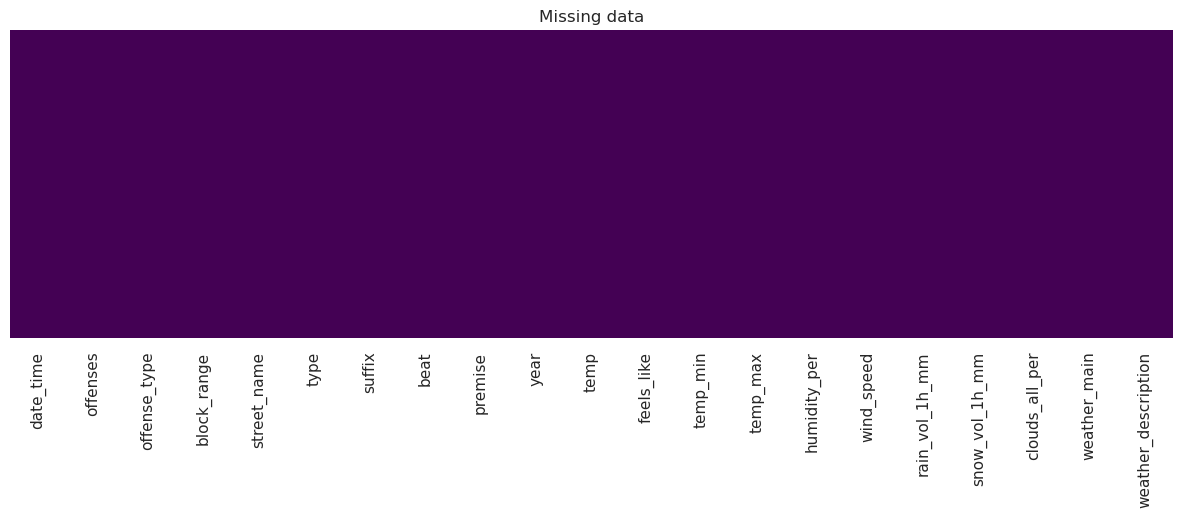

In [66]:
plt.figure(figsize=(15,4))
sns.heatmap(new.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [90]:
dd = crime_sample.merge(new, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

dd

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise,year,temp,feels_like,temp_min,temp_max,humidity_per,wind_speed,rain_vol_1h_mm,snow_vol_1h_mm,clouds_all_per,weather_main,weather_description,_merge


In [91]:
dd = new.merge(crime_sample, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

dd

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise,year,temp,feels_like,temp_min,temp_max,humidity_per,wind_speed,rain_vol_1h_mm,snow_vol_1h_mm,clouds_all_per,weather_main,weather_description,_merge


# Merge crime data and weather data full dataset

In [100]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125124 entries, 0 to 1125123
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   date_time     1125124 non-null  object
 1   offenses      1125124 non-null  int64 
 2   offense_type  1125124 non-null  object
 3   block_range   1125124 non-null  object
 4   street_name   1125117 non-null  object
 5   type          1125124 non-null  object
 6   suffix        1125124 non-null  object
 7   beat          1125124 non-null  object
 8   premise       1125124 non-null  object
 9   year          1125124 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 85.8+ MB


In [103]:
df_crime.head()

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise,year
0,2009-08-01 00:00:00,1,Robbery,3000-3099,durham,dr,N,3B30,210,2009
1,2009-08-01 00:00:00,1,Robbery,500-599,seminar,dr,-,6B60,20a,2009
2,2009-08-01 00:00:00,1,Robbery,8300-8399,north houston rosslyn,rd,-,6B30,18n,2009
3,2009-08-01 00:00:00,1,Robbery,6300-6399,skyline,dr,-,18F30,18a,2009
4,2009-08-01 00:00:00,1,Robbery,5900-5999,fulton,st,-,2A20,18n,2009
